# TP 1 - Séance 2
## Rehaussement d'image

Équipe #0
- Nom, Prénom (Matricule)
- Nom, Prénom (Matricule)

In [44]:
# Importe les modules qui seront utilisés dans le laboratoire.
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imsave
from scipy.ndimage import convolve
import skimage.filters as skfilters
import skimage.morphology as skmorph

from cv2 import cvtColor, COLOR_RGB2GRAY
from cv2 import imread as cv2Imread

%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 7)

# Exercice III: Prétraitement d'images grayscale

<font color='red'> Dans toutes les questions de cet exercice, prenez soin de spécifier les bornes des intensités lors de l'affichage. Voir énoncé en pdf. \
Tous les fichiers et les images dont vous aurez besoin pour cette séance sont dans le dossier 'fichiers_seance_2'. Vos chemins devront être ajustés en conséquence. 
</font>

## Égalisation d'histogramme

**1.** Ouvrez, convertissez en valeurs entières et affichez l'image ```radio_thoracique.png```.
Prenez soin de spécifier les bornes des intensités lors de l'affichage.

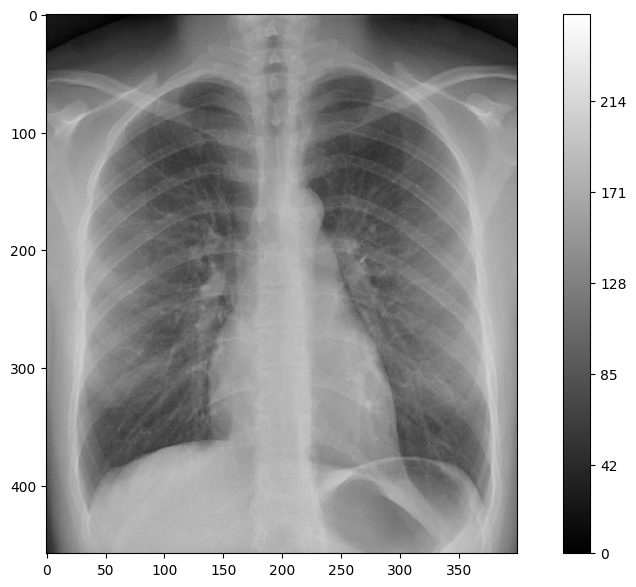

La valeur minimale est 0 et la valeur maximale est 214


In [67]:
img = imread("fichiers_seance_2/radio_thoracique.png")
img_entier = np.round(img * 255).astype(np.uint8)

plt.imshow(img_entier, cmap = "gray", vmin = 0.0, vmax = 255.0)
plt.colorbar(ticks = np.linspace(np.min(img_entier), np.max(img_entier), 6).astype(np.uint8))
plt.show()
print(f"La valeur minimale est {np.min(img_entier)} et la valeur maximale est {np.max(img_entier)}")

**2.** À l'aide de [np.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html), calculez puis affichez son histogramme.  
Pour gagner du temps aux questions suivantes, vous pouvez définir une fonction qui effectue ces deux opérations.

C:\Users\sophi\AppData\Local\Temp\ipykernel_23420\4203755930.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


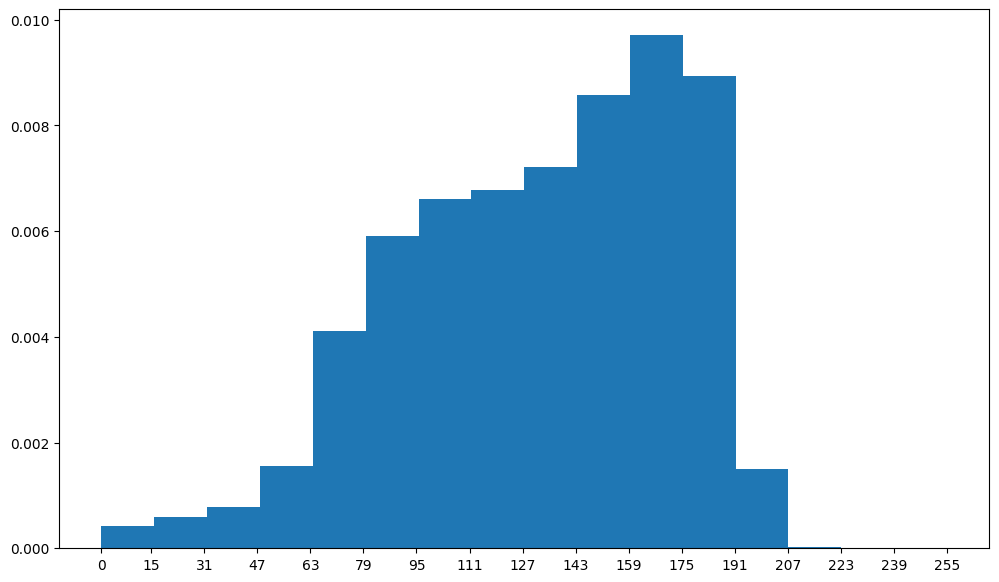

In [69]:
def plot_histogram(img: np.array, ax: plt.Axes = None) -> None:
    counts, bins = np.histogram(img, bins= 16 ,range=(0.0, 255.0) , density=True)

    if ax:
        ax.stairs(counts, bins, fill=True)
        ax.set_xticks(np.linspace(0, 255, 17).astype(np.uint8));
    
    else:
        fig, ax = plt.subplots()
        ax.stairs(counts, bins, fill=True)
        ax.set_xticks(np.linspace(0, 255, 17).astype(np.uint8));
        fig.show();

plot_histogram(img_entier)

**3a.** Complétez la fonction ```equalize_histogram(img)``` qui effectue l'égalisation d'histogramme d'une image `img` et renvoie l'image égalisée.

In [70]:
def equalize_histogram(img: np.array) -> np.array:
    counts, bins = np.histogram(img, bins=256,range=(0.0, 255.0), density=True)
    cumsum_data = np.cumsum(counts)
    img_eq = cumsum_data[img] * 255
    return img_eq.astype(np.uint8)

    # Astuces: pour transformer l'intensité de chaque pixel d'une image I selon un mapping T
    # (c'est-à-dire pour calculer Ieq[i,j] = T[I[i,j]] pour tous les i et j), pas besoin de boucle:
    # il suffit de faire: Ieq = T[I]

**3b.** Comparez l'image et son histogramme avant et après l'égalisation. Prenez soin de spécifier les bornes des intensités lors de l'affichage. Que constatez vous? Quel impact a l'égalisation sur le contraste de l'image?

C:\Users\sophi\AppData\Local\Temp\ipykernel_23420\2514711894.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


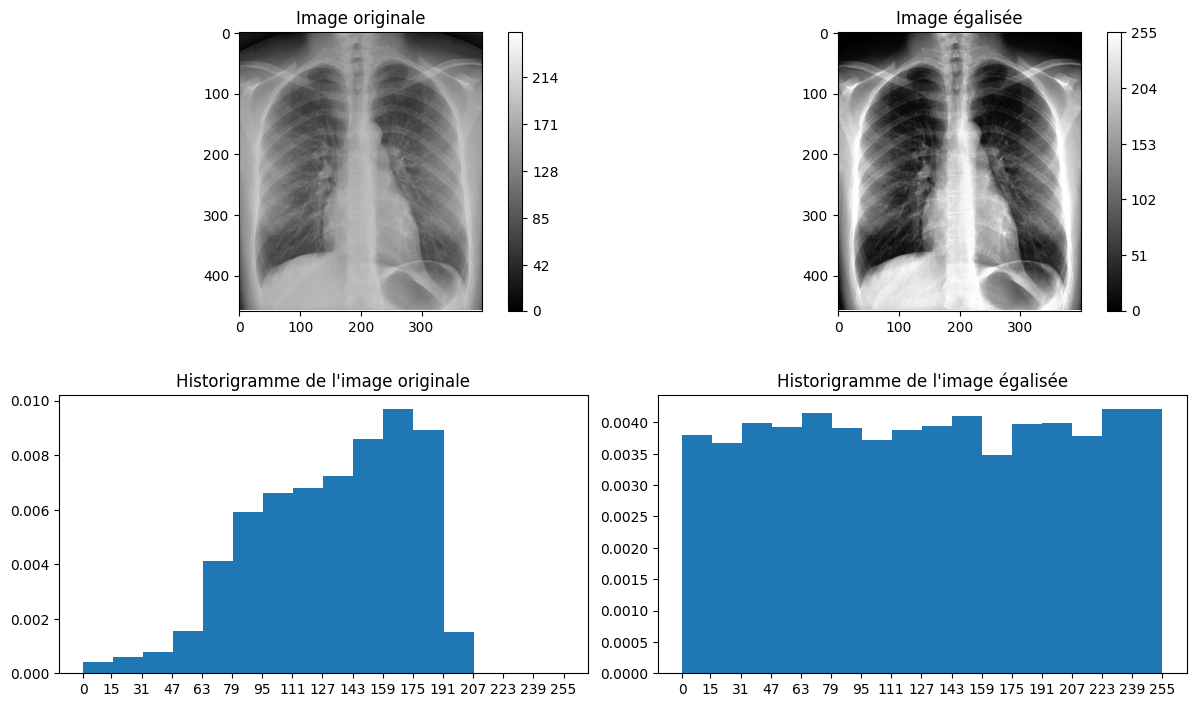

In [73]:
img_egal=equalize_histogram(img_entier)

fig, [[ax_ori, ax_egal],[ax_hist_ori, ax_hist_egal]] = plt.subplots(2, 2)
fig.tight_layout(h_pad=4.0, w_pad=2.0)

ax_ori.set_title("Image originale")
im_graphe=ax_ori.imshow(img_entier, cmap="gray",vmin=0,vmax=255)
fig.colorbar(im_graphe,ticks=np.linspace(np.min(img_entier),np.max(img_entier), 6).astype(np.uint8),ax=ax_ori)
plot_histogram(img_entier,ax_hist_ori)
ax_hist_ori.set_title("Historigramme de l'image originale")



ax_egal.set_title("Image égalisée")
im_graphe_egal=ax_egal.imshow(img_egal, cmap="gray",vmin=0,vmax=255)
fig.colorbar(im_graphe_egal,ticks=np.linspace(np.min(img_egal), np.max(img_egal), 6).astype(np.uint8), ax=ax_egal)
plot_histogram(img_egal,ax_hist_egal)
ax_hist_egal.set_title("Historigramme de l'image égalisée")
fig.show()


Le contraste de l'image égalisée est beaucoup plus prononcé que celui de l'image originale. En observant l'histogramme de ces images, il est possible de constater que la plage d'intensité utilisée est beaucoup plus grande et uniformisée dans l'image égalisé que dans l'image normale. 

**4.** Effectuez les mêmes opérations qu'à la question **3b** (égalisation d'histogramme puis affichage de l'image et l'histograme avant et après l'égalisation) sur l'image `fundus_mauvais_contraste`. Que constatez-vous ? Que proposeriez-vous afin d'améliorer le contraste et la visibilité des structures de l'oeil dans cette image ?

C:\Users\sophi\AppData\Local\Temp\ipykernel_23420\3948010310.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Ellipsis

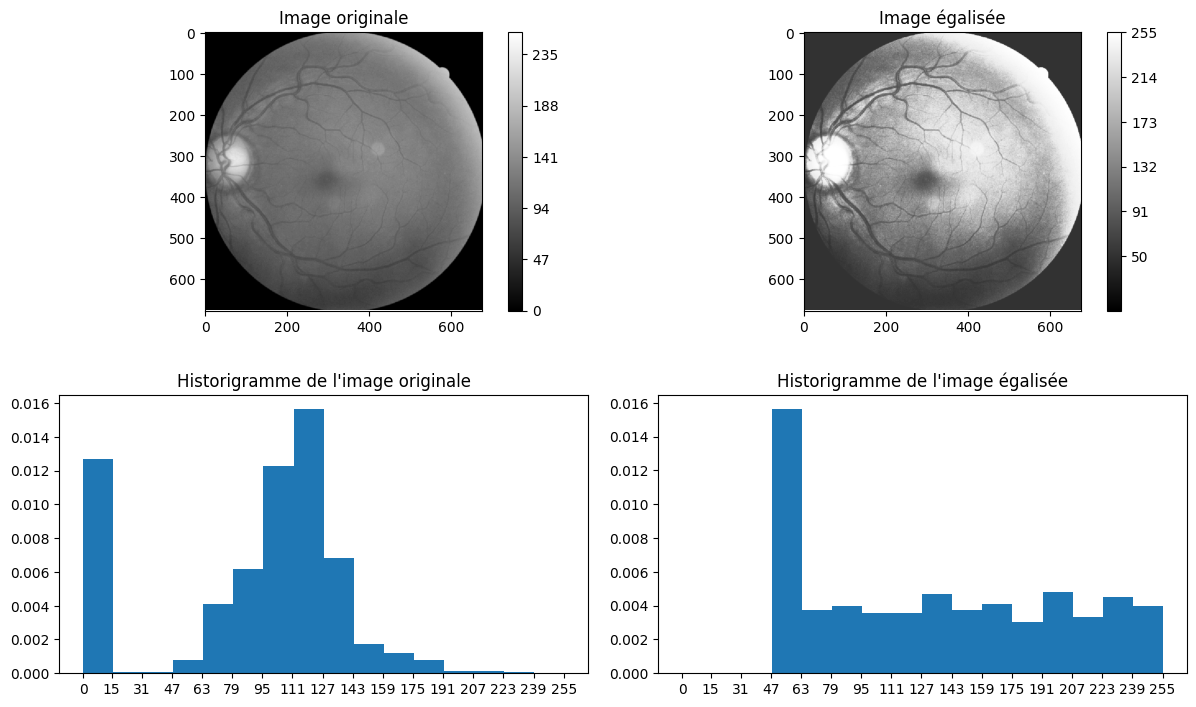

In [74]:
# l'image fournie est une image couleur à 3 canaux. Pour appliquer les mêmes fonctions que décrites plus haut, on doit
# transformer l'image couleur en image à tons de gris. Utilisez les lignes de code fournies à cet effet.
image = cv2Imread("fichiers_seance_2/fundus_mauvais_contraste.png")
gray = cvtColor(image, COLOR_RGB2GRAY)


img_fundus_egal=equalize_histogram(gray)

fig, [[ax_ori, ax_egal],[ax_hist_ori, ax_hist_egal]] = plt.subplots(2, 2)
fig.tight_layout(h_pad=4.0, w_pad=2.0)

ax_ori.set_title("Image originale")
im_graphe=ax_ori.imshow(gray, cmap="gray",vmin=0,vmax=255)
fig.colorbar(im_graphe,ticks=np.linspace(np.min(gray), np.max(gray), 6).astype(np.uint8),ax=ax_ori)
plot_histogram(gray,ax_hist_ori)
ax_hist_ori.set_title("Historigramme de l'image originale")



ax_egal.set_title("Image égalisée")
im_graphe_egal=ax_egal.imshow(img_fundus_egal, cmap="gray",vmin=0,vmax=255)
fig.colorbar(im_graphe_egal,ticks=np.linspace(np.min(img_fundus_egal), np.max(img_fundus_egal), 6).astype(np.uint8), ax=ax_egal)
plot_histogram(img_fundus_egal,ax_hist_egal)
ax_hist_egal.set_title("Historigramme de l'image égalisée")
fig.show()



...

On constate un grand pic à 0 dans l'image d'origine. Comme on a une quantité importante de pixels à 0 dans l'image d'origine, l'historigramme cumulé augmente rapidement vers des valeurs de 0.2. On voit donc sur l'échelle de couleurs de l'image égalisée que la valeur minimale est de 50 (0,2 x 255). Cela induit une mauvaise distribution des intensités des pixels, comme on peut l'observer sur l'historigramme de l'image égalisée. Bien qu'on perde certaines informations sur la définition du contour de l'oeil, on remarque une meilleure définition des vaisseaux sanguins,du nerf optique et de la macula. On pourrait utiliser un filtre high boost pour mieux définir les contours des différentes structures.

## Filtrage High-Boost

**5.** Ouvrez l'image ```angiography.jpg```. Convertissez l'image en valeurs flottantes (normalisez par la valeur maximale) et conservez uniquement le premier canal de cette image. Affichez l'image résultante. 

In [75]:
angio = imread("fichiers_seance_2/angiography.jpg")
angio_canal=angio[:,:,0]
angio_float=angio_canal/np.max(angio_canal)
print(angio_float)

[[0.41960784 0.43137255 0.44313725 ... 0.29803922 0.34117647 0.30980392]
 [0.44313725 0.42745098 0.43137255 ... 0.3372549  0.25490196 0.23529412]
 [0.45098039 0.45098039 0.4627451  ... 0.34901961 0.3372549  0.28627451]
 ...
 [0.34509804 0.3254902  0.3254902  ... 0.51372549 0.44313725 0.44313725]
 [0.38431373 0.34509804 0.34509804 ... 0.49411765 0.4745098  0.45882353]
 [0.34509804 0.34509804 0.35294118 ... 0.46666667 0.46666667 0.43921569]]


**6.** En utilisant la fonction [convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html), calculez la convolution de l'image angiographique avec une filtre gaussien de taille $3 \times 3$: 

$W_{Gaussienne3}\ =\ \dfrac{1}{16}\ \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix} $

Affichez côte à côte l'image angiographique et le résultat de la convolution.

_N'hésitez pas à augmenter la taille de la figure pour mieux observer les images._

C:\Users\sophi\AppData\Local\Temp\ipykernel_23420\888019426.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


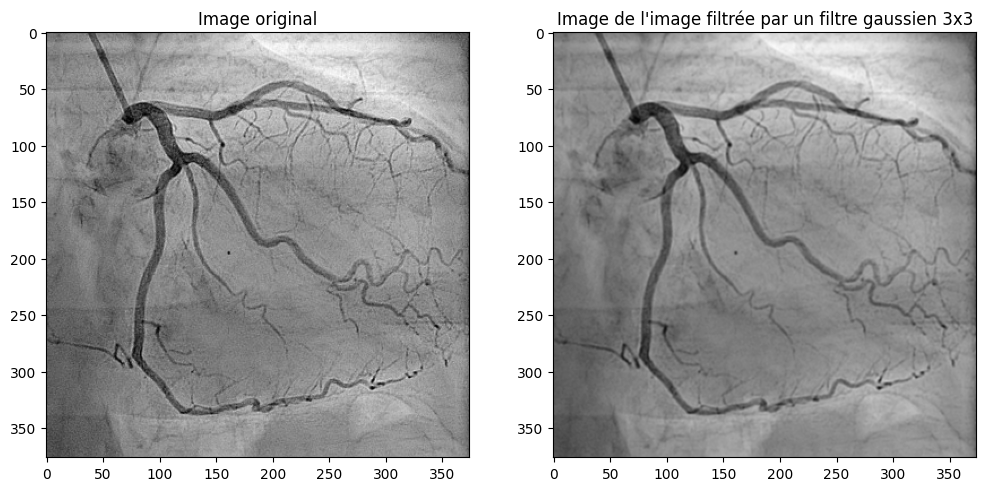

In [76]:
# On vous donne le masque de convolution:
Wgaussienne3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

angio_filtre_3 = convolve(angio_float, Wgaussienne3, mode='nearest')

fig, [ax_ori, ax_conv] = plt.subplots(1, 2)

ax_ori.set_title("Image original")
ax_ori.imshow(angio_float, cmap="gray",vmin=0,vmax=1)
ax_conv.set_title("Image de l'image filtrée par un filtre gaussien 3x3")
ax_conv.imshow(angio_filtre_3, cmap="gray",vmin=0, vmax=1)

fig.show()


**7a.** Effectuez la même opération (convolution et affichage) avec une Gaussienne de taille 7x7: 

$W_{Gaussienne7}\ =\ \dfrac{1}{1115}\ 
\begin{bmatrix} 
 1 &  4 &  7 & 10 &  7 &  4 &  1 \\
 4 & 12 & 26 & 33 & 26 & 12 &  4 \\
 7 & 26 & 55 & 71 & 55 & 26 &  7 \\
10 & 33 & 71 & 91 & 71 & 33 & 10 \\
 7 & 26 & 55 & 71 & 55 & 26 &  7 \\
 4 & 12 & 26 & 33 & 26 & 12 &  4 \\
 1 &  4 &  7 & 10 &  7 &  4 &  1 \\
\end{bmatrix} $


C:\Users\sophi\AppData\Local\Temp\ipykernel_23420\3100383601.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


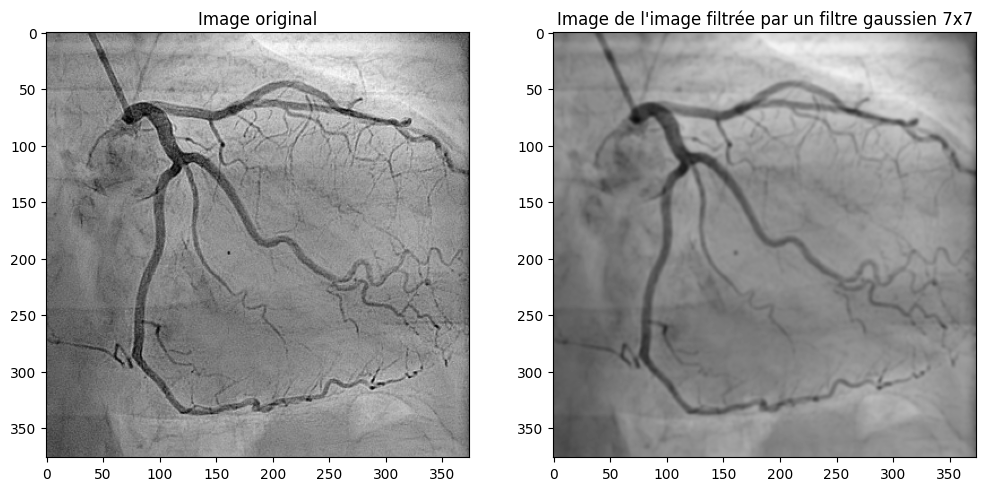

In [77]:
# On vous donne le masque de convolution:
Wgaussienne7 = (
    np.array(
        [
            [1, 4, 7, 10, 7, 4, 1],
            [4, 12, 26, 33, 26, 12, 4],
            [7, 26, 55, 71, 55, 26, 7],
            [10, 33, 71, 91, 71, 33, 10],
            [7, 26, 55, 71, 55, 26, 7],
            [4, 12, 26, 33, 26, 12, 4],
            [1, 4, 7, 10, 7, 4, 1],
        ]
    )
    / 1115
)
angio_filtre_7=convolve(angio_float, Wgaussienne7, mode='nearest')

fig, [ax_ori, ax_conv] = plt.subplots(1, 2)

ax_ori.set_title("Image original")
ax_ori.imshow(angio_float, cmap='gray',vmin=0,vmax=1)
ax_conv.set_title("Image de l'image filtrée par un filtre gaussien 7x7")
ax_conv.imshow(angio_filtre_7, cmap='gray',vmin=0,vmax=1)

fig.show()


**7b.** Qu'observez vous lorsque l'écart-type de la gaussienne augmente ?  Quel est le type de ces deux filtres gaussiens?

On observe qu'en augmentant l'écart-type on coupe davantage de hautes fréquences. Ce qui se traduit par des contours moins bien définis de manière générale, mais qui permet d'éliminer les bruit en arrière-plan des fins éléments qui ne sont pas des vaisseaux sanguins.

**8a.** Calculez et affichez le Laplacien de l'image angiographique en la convoluant avec:

$W_{Laplacien}\ =\
\begin{bmatrix} 
 -1 & -1 & -1 \\
 -1 & 8 & -1 \\
 -1 & -1 & -1 \\
\end{bmatrix} $

_(Attention: le Laplacien d'une image contient des valeurs négatives, pour les visualiser correctement les bornes d'affichages doivent être -1 et 1!)_

C:\Users\sophi\AppData\Local\Temp\ipykernel_23420\2577367605.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


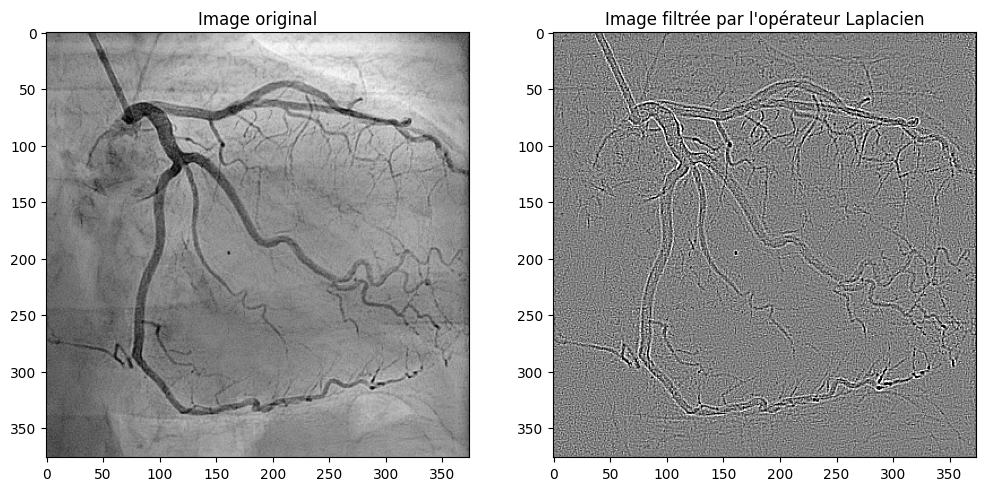

In [78]:
# On vous donne le masque de convolution:
Wlaplacien = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

angio_laplacien = convolve(angio_float, Wlaplacien, mode='nearest')

fig, [ax_ori, ax_conv] = plt.subplots(1, 2)

ax_ori.set_title("Image original")
ax_ori.imshow(angio_float, cmap='gray',vmin=0,vmax=1)
ax_conv.set_title("Image filtrée par l'opérateur Laplacien")
ax_conv.imshow(angio_laplacien, cmap='gray', vmin=-1.0, vmax=1.0)

fig.show()

**8b.** Quel est le type de ce filtre?

C'est un filtre passe-haut, car la somme des coefficients de la matrice utilisée est nulle. Ce qui est caractéristique d'un filtre passe-haut. On remarque aussi sur l'image filtrée qu'uniquement les contours sont conservés.

On rappelle que le filtrage high-boost est défini par:  
  $I_{g} =  I * W_{gaussienne3}$  
  $I_{HighBoost} = I + k \times (I_g * W_{laplacien})$  
  (avec $I$ l'image originale, $I_{HighBoost}$ l'image filtrée, et $I* _{gaussienne3}$ la convolution entre l'image et le masque gaussien de taille $3 \times 3$.)

**9a.** Implémentez la fonction `high_boost(img, k)` qui prend en paramètre l'image $I$ et $k$ et renvoie l'image après le filtrage High Boost. Affichez le résultat pour $k=0$, $k=1$ et $k=2$.  (Limitez l'affichage entre 0 et 1!)


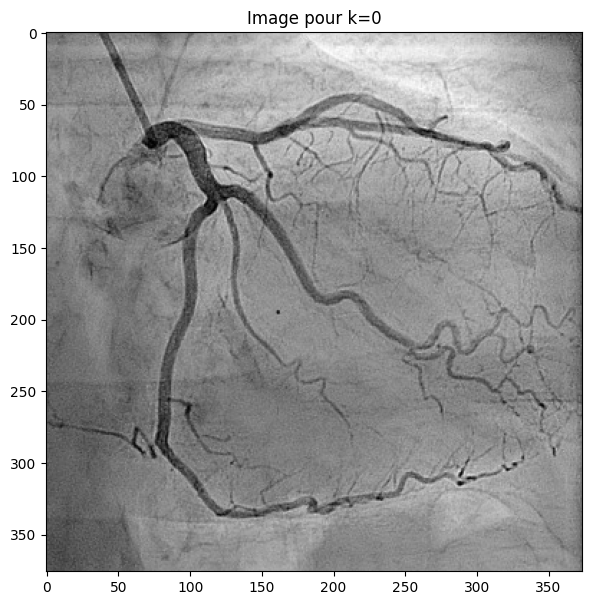

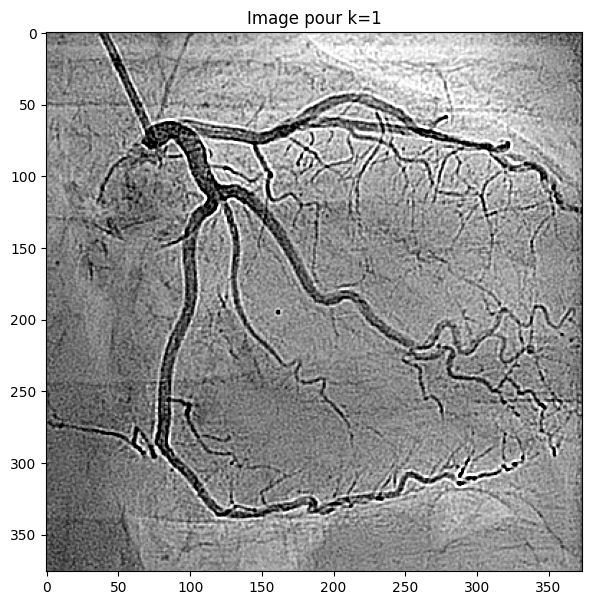

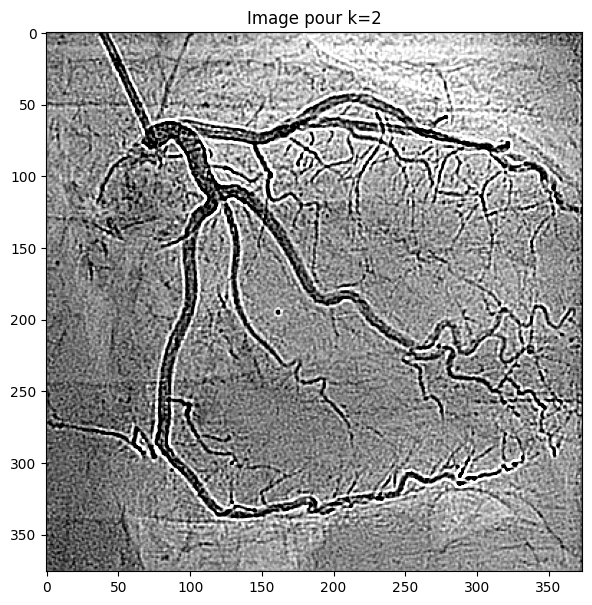

In [84]:
def high_boost(img, k):
    img_inter=convolve(img, Wgaussienne3, mode='nearest')
    img_laplacien=convolve(img_inter, Wlaplacien, mode='nearest')

    return img+k*img_laplacien
for k in range(0,3):
    plt.imshow(high_boost(angio_float,k),cmap='gray',vmin=0,vmax=1)
    plt.title(f"Image pour k={k}")
    plt.show()
    


    


**9b.** Discutez de l'impact du facteur $k$ sur la lisibilité de l'image (et donc la qualité du réhaussement).

Comme le bruit est une accumulation de hautes fréquences, si on met un filtre high-boost, on amplifie ces fréquences. On remarque donc qu'en augmentant k on augmente le bruit environnant. Cependant, on remaque aussi une meilleurs définition des contours avec l'augmentation de k si on compare à l'image originale.

**9c.** Dans ce filtrage, pourquoi calculer le laplacien sur $I_g$ plutôt que sur $I$ directement?  
_(Appuyez-vous sur vos observations de la question 7b.)_

Tel que discuté plus haut, le bruit est augmenté par le filtre high-boost. Il est donc important de le réduire avant de l'appliquer à l'image. On utilise donc le filtre gaussien afin de diminuer le bruit  sans générer de repliement de spectre dans le domaine fréquentiel.

# Exercice IV: Filtrage Médian et Morphologique

Cet exercice met en oeuvre des filtrages médians et morphologiques qui sont implémentés dans les modules pythons:   
```skimage.morphology``` et ```skimage.filters``` importé sous les noms: ```skmorph``` et ```skfilters``` (déjà importés dans la première cellule du notebook).

## Élimination du bruit par filtrage médian

**1a.** Chargez (sans conversion en intensités entières) et affichez l'image ```fundus_bruit.png```.

**1b.** Quel est le nom du bruit qui déteriore cette image de la rétine?

Pour la suite de l'exercice nous ne nous intéresserons qu'au canal vert de l'image.

**2.** Filtrez le bruit identifié à la question précédente à l'aide d'un filtrage médian [skfilters.median](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median). Utilisez un élément structurant sous forme d'un disque (voir [skmorph.disk](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk)). Trouvez un rayon de disque approprié pour le filtrage. Affichez côte à côte le canal vert de l'image avant et après le filtrage.

**3.** Filtrez le bruit identifié à la question précédente avec les filtres gaussiens utilisés à l'exercice précédent (convolution de l'image avec un filtre gaussien). Le filtrage gaussien présenté dans l'exercice I aurait-il été un meilleur ou moins bon choix pour cette tâche ? Pourquoi ?

Les traitements présentés dans les deux sections suivantes seront appliqués sur **la version filtrée du canal vert** de l'image notée $I_V$.

## Réhaussement des vaisseaux

Afin de simplifier la détection des vaisseaux sur les images de la rétine, un prétraitement très utilisé consiste à effectuer une correction d'illumination locale. En définissant $F_{m}$ un filtre médian avec un large élément structurant (un disque de rayon 12), l'image prétraitée $I_P$ est calculée par: $I_P = I_V - F_m(I_V)$.

**4a.** Calculez et affichez le résultat du filtrage médian $F_{m}(I_V)$ et du prétraitement $I_P$. Cette correction d'illumination est-elle efficace?


**4b.** Les vaisseaux sont-ils un contenu hautes ou basses fréquences spatiales? Même question pour le résultat du filtrage médian $F_{m}(I_V)$.

## Segmentation du disque optique

On se propose de segmenter le disque optique (la tête du nerf optique apparaissant en clair sur l'image et dont émerge les vaisseaux) avec un seuil et des opérations morphologiqes.

**5a.** Implémentez la fonction ```binariser(img, seuil)``` qui prend en paramètre une image et un seuil et qui renvoie l'image binarisée: où tous les pixels inférieurs au seuil valent $0$ et tous ceux égaux ou supérieurs au seuil valent $1$.

**5b.** Calculez et affichez l'image $I_V$ binarisée avec un seuil de $0.6$. On notera cette image binarisé $I_B$.

In [54]:
def binariser(img, seuil):
    ...
    return

Vous devriez constater deux erreurs:
 - les vaisseaux émergeant du disque optique forment des trous dans sa segmentation; 
 - un artefact est détecté à tord dans le coin supérieur droit de l'image. 
 
On va corriger ces deux erreurs avec une ouverture et une fermeture (cf. [skmorph.binary_opening](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_opening) et [skmorph.binary_closing](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_closing))

**6a.** Refermez les trous causés par les vaisseaux à l'aide de l'opération morphologique adéquate. Vous devrez choisir un élément structurant adapté. 

**6b.** Effacez l'artefact supérieur droit sans altérer la segmentation du disque avec l'autre opération morphlogique. Une fois encore, choisissez un élément structurant adapté.

On souhaite faire une estimation rapide du rayon et du centre du disque optique tel qu'il a été segmenté aux questions précédentes.

**7.** En effectuant des érosions successives de la segmentation par des disques de rayon 1,2,3... jusqu'à ce que la segmentation disparaisse, déterminez le rayon et la position du centre du disque optique.


In [55]:
# Astuce: np.any(I) renvoie vrai si tous les pixels de I valent 0
#         y,x = np.where(I) renvoie les coordonées des pixels différents de 0 de I.